# Lets try and get rid of these annoying non-stoichiometric compounds

In [2]:
import scipy.sparse
import numpy as np
import pylab as plt

%matplotlib 

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
def load_sparse_csr(filename):
    loader = np.load(filename)
    return scipy.sparse.csr_matrix((  loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])
Dataframe=load_sparse_csr("Dataframe.npz")

In [4]:
st_array= np.array([list(Dataframe[i].data[0:3]) for i in range(Dataframe.shape[0])])

In [5]:
not_stoich=np.array([np.any(np.mod(Dataframe[i].data,1)!=0) for i in range(Dataframe.shape[0])]) 

In [73]:
print st_array[0:5];not_stoich[0:5]

[[ 8.   1.   6. ]
 [ 4.   1.   1. ]
 [ 3.   0.5  4. ]
 [ 1.   1.   1. ]
 [ 1.   3.   9. ]]


array([False, False,  True, False, False], dtype=bool)

In [8]:
not_stoich_dat=st_array[not_stoich]

In [80]:
print not_stoich_dat[0:20]

[[  3.00000000e+00   5.00000000e-01   4.00000000e+00]
 [  3.46000000e+00   4.80000000e+01   2.15400000e+01]
 [  3.09000000e+00   8.22000000e+00   1.00000000e+00]
 [  3.30000000e-01   1.00000000e+00   4.00000000e+00]
 [  1.00000000e+00   1.50000000e+00   1.50000000e+00]
 [  1.00000000e+00   1.50000000e+00   1.50000000e+00]
 [  9.37000000e-01   1.00000000e+00   1.00000000e+00]
 [  2.00000000e-02   3.00000000e+00   1.98000000e+00]
 [  1.00000000e+00   9.95000000e-01   1.00000000e+00]
 [  3.00000000e+00   3.00000000e-01   1.00000000e+00]
 [  9.91000000e+00   6.00000000e+00   1.09000000e+00]
 [  3.00000000e+00   7.80000000e+00   1.60000000e+01]
 [  2.66000000e+00   6.70000000e-01   1.00000000e+00]
 [  1.00000000e+00   1.91440000e+01   5.00000000e+01]
 [  2.53330000e+01   4.00000000e+01   6.67000000e-01]
 [  3.62000000e+00   6.95000000e+00   1.60000000e+01]
 [  7.00000000e+00   1.82500000e+01   9.60000000e-01]
 [  9.73000000e-01   1.00000000e+00   1.00000000e+00]
 [  1.70000000e-01   3.00000

In [9]:
truly_not_stoich=np.array([np.mod(sum(Dataframe[i].data),1)!=0 for i in range(Dataframe.shape[0])]) 

In [87]:
print len(st_array[truly_not_stoich])

7286


In [10]:
truly_not_stoich_dat=st_array[truly_not_stoich]

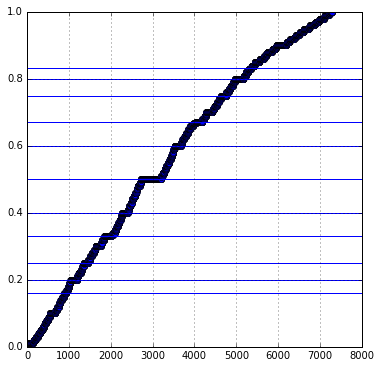

In [55]:

plt.figure(figsize=(6,6))
plt.plot(sorted(np.modf(np.sum(truly_not_stoich_dat,axis=1))[0]),'o')
plt.grid()
for y in [0.5,0.33,0.67,0.2,0.4,0.6,0.8,0.25,0.75,0.16,0.833]:
    plt.axhline(y)

In [19]:
stoich=np.array([np.all(np.mod(Dataframe[i].data,1)==0) for i in range(Dataframe.shape[0])]) 

In [20]:
stoich_dat=st_array[stoich]

In [31]:
sort_stoich= sorted(stoich_dat, key=lambda x: sum(x),reverse=True)

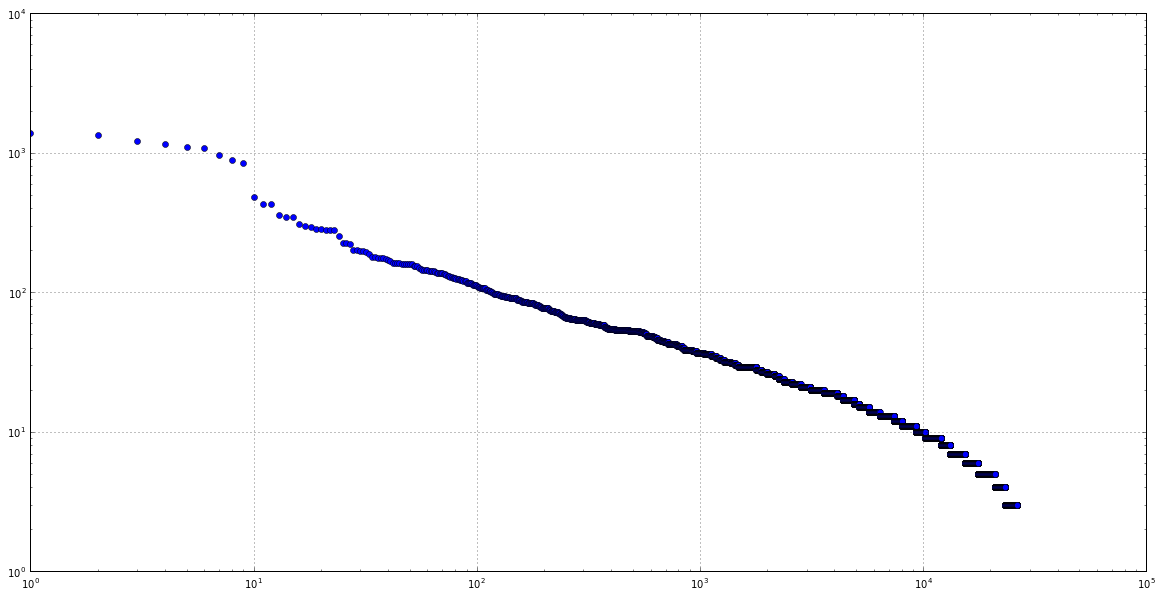

In [35]:
%matplotlib inline
plt.figure(figsize=(20,10))
plt.loglog(np.sum(sort_stoich,axis=1),'o')
plt.grid()

In [56]:
threshold=1000
stoich_thresh=np.array(sort_stoich)[np.sum(sort_stoich,axis=1)<threshold]


In [57]:
len(stoich_thresh),len(sort_stoich)

(26248, 26255)

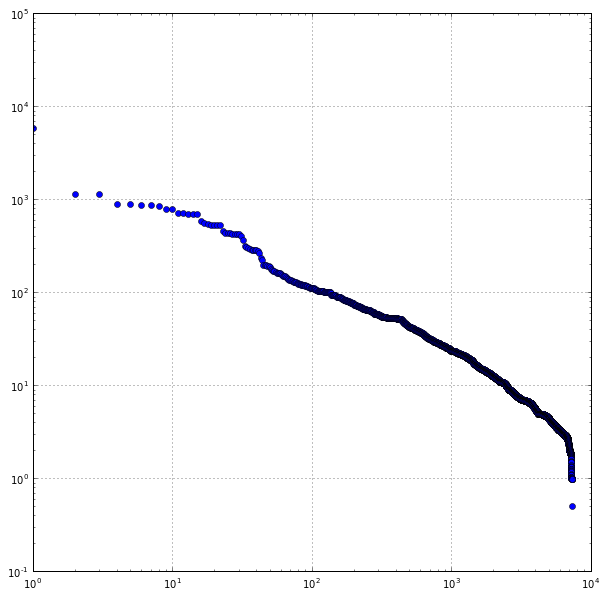

In [47]:
plt.figure(figsize=(10,10))
plt.loglog(sorted(np.sum(truly_not_stoich_dat,axis=1),reverse=True),'o')
plt.grid()

In [53]:
threshold=2.8
not_stoich_thresh=np.array(truly_not_stoich_dat)[np.sum(truly_not_stoich_dat,axis=1)<threshold]

In [54]:
len(not_stoich_thresh),len(truly_not_stoich_dat)

(573, 7286)